K=1 Accuracy: 0.97
K=3 Accuracy: 1.00
K=5 Accuracy: 1.00
K=7 Accuracy: 1.00
K=9 Accuracy: 1.00


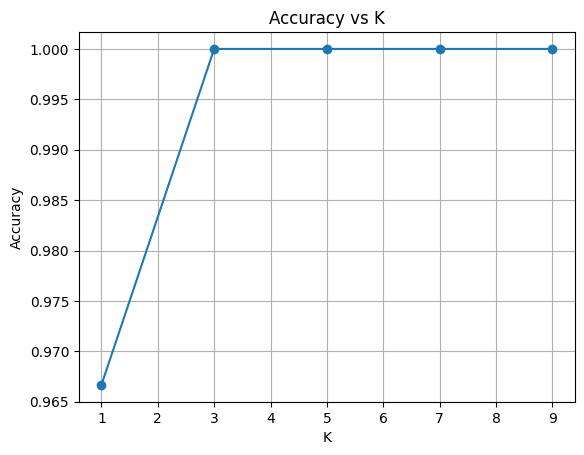

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



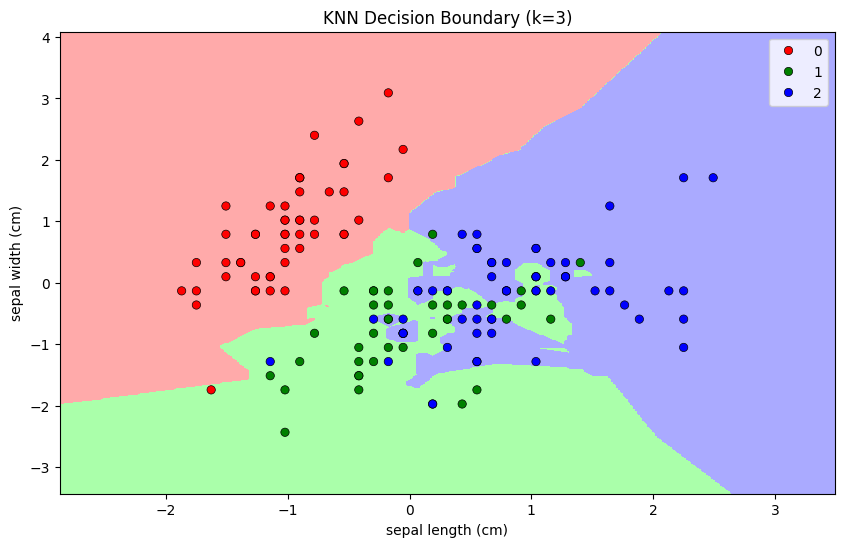

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()



# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# 2. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 3. Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 4. Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Try Different K Values
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} Accuracy: {acc:.2f}")

# 7. Plot Accuracy vs K
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# 8. Evaluate Best Model
best_k = k_values[np.argmax(accuracy_scores)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# 9. Visualize Decision Boundary (Using only 2 features for 2D)
X_2d = X_scaled[:, :2]  # only first 2 features
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train2, y_train2)

h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette=cmap_bold, edgecolor='k')
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()
